In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [7]:
age_mean = df['Age'].mean()
age_mean

29.69911764705882

In [8]:
df['Age'].fillna(age_mean,inplace=True)    # inplace=True means changes would we reflected in the actual dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
em_mode = df['Embarked'].mode().max()
print(em_mode)

S


In [11]:
df['Embarked'].fillna(em_mode,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
print(type(df.dtypes))
df.dtypes

<class 'pandas.core.series.Series'>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
#### Columns to be excluded:
# 1) Name (It is insignificant)
# 2) PassengerId (It is insignificant)
# 3) Cabin (It has way too many null values, around 77%)

#### Columns to be encoded to int:
# 1) Sex
# 2) Ticket
# 3) Embarked

In [16]:
df.drop(['Name','PassengerId','Cabin'],inplace=True,axis=1)
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [17]:
obj_cols = [i for i in df.columns if df[i].dtypes=='object']
obj_cols

['Sex', 'Ticket', 'Embarked']

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb = LabelEncoder()
for i in obj_cols:
    df[i] = lb.fit_transform(df[i])

In [20]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked      int64
dtype: object

In [21]:
corr = df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,1.000000


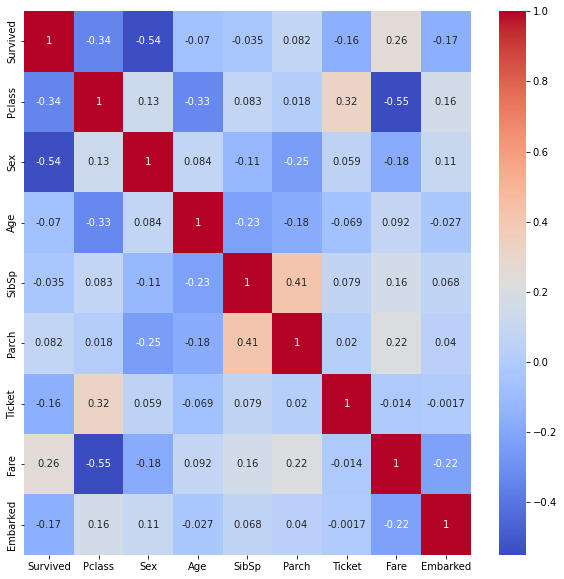

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# Upper triangle and lower triangle values are similar because we have the same columns as that of rows.
# Any column which are highly correlated means value is closer to 1 (0.7 + ).
# Say there are two similar columns (SibilingSpouse and relative), they are highly correlated and we need 
# to use only one of them for classification and the other one will be an unwanted column.

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
x = df.iloc[:,1:]
y = df['Survived']

print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [29]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
df['Ticket'].nunique()

681

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)    
print(x_train.shape)                                                       
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 8)
(223, 8)
(668,)
(223,)


## Model Building

In [34]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [49]:
def test_metrics(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Accuracy Score = ',accuracy_score(ytest,ypred))
    print('Confusion Matrix = \n',cm)
    print('Classification Report = \n',classification_report(ytest,ypred,zero_division=0))
    
def tt_score(model):
    print('Training Score = ', model.score(x_train,y_train))
    print('Testing Score = ', model.score(x_test,y_test))

### 1) Log_Reg

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [52]:
tt_score(m1)

Training Score =  0.8038922155688623
Testing Score =  0.8071748878923767


In [53]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1
 1]


In [56]:
test_metrics(y_test,ypred_m1)

Accuracy Score =  0.8071748878923767
Confusion Matrix = 
 [[117  17]
 [ 26  63]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.79      0.71      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



### 2) KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
m2 = KNeighborsClassifier(n_neighbors=21)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [72]:
tt_score(m2)

Training Score =  0.7215568862275449
Testing Score =  0.6905829596412556


In [73]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1
 0]


In [74]:
test_metrics(y_test,ypred_m2)

Accuracy Score =  0.6905829596412556
Confusion Matrix = 
 [[117  17]
 [ 52  37]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       134
           1       0.69      0.42      0.52        89

    accuracy                           0.69       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.69      0.69      0.67       223



### 3) Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
m3 = RandomForestClassifier(n_estimators=70,criterion='entropy',max_depth=9)
m3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=70)

In [77]:
tt_score(m3)

Training Score =  0.9416167664670658
Testing Score =  0.8385650224215246


In [84]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1]


In [79]:
test_metrics(y_test,ypred_m3)

Accuracy Score =  0.8385650224215246
Confusion Matrix = 
 [[126   8]
 [ 28  61]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       134
           1       0.88      0.69      0.77        89

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223



### 4) SVM

In [81]:
from sklearn.svm import SVC

In [88]:
m4 = SVC(kernel='linear',C=1)
m4.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [89]:
tt_score(m4)
# Overfit model means high training score, low testing score (in case of kernel='rbf').

Training Score =  0.7949101796407185
Testing Score =  0.7937219730941704


In [90]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 1]


In [91]:
test_metrics(y_test,ypred_m4)

Accuracy Score =  0.7937219730941704
Confusion Matrix = 
 [[118  16]
 [ 30  59]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       134
           1       0.79      0.66      0.72        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



### 5) DecisionTree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
m5 = DecisionTreeClassifier(criterion='gini',max_depth=7)
m5.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [94]:
tt_score(m5)

Training Score =  0.8802395209580839
Testing Score =  0.7892376681614349


In [95]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

[0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 1]


In [96]:
test_metrics(y_test,ypred_m5)

Accuracy Score =  0.7892376681614349
Confusion Matrix = 
 [[115  19]
 [ 28  61]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       134
           1       0.76      0.69      0.72        89

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



## Best Models for:
### Accuracy - <u>Random Forest Classifier</u>
### Precision - <u>Logistic Regression</u> and <u>Random Forest Classifier</u>
### Recall - <u>Logistic Regression</u>